In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re as re
import statsmodels.api as sm
from scipy import stats
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
import sys
 
 
print("User Current Version:-", sys.version)

User Current Version:- 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]


In [3]:
drive.mount('content/')

Mounted at content/


In [ ]:
! ls -l content/MyDrive/Projekt/

total 4315
-rw------- 1 root root 1762163 Sep 22 09:47 2022-09-22_CAS-ADS_Modul2_BikeRentalAnalysis_StefanoBrandinu_MarcBratschi.pptx
-rw------- 1 root root  462331 Oct 28 12:10 Bike_Rental.ipynb
-rw------- 1 root root 2135082 Sep 21 19:46 CAS_ADS_Modul2_BikeRentalAnalysis_StefanoBrandinu_MarcBratschi_20220922.pptx
-rw------- 1 root root   57569 Sep 18 13:29 day.csv


In [4]:
df_raw = pd.read_csv('content/MyDrive/Projekt/day.csv',
                     header=0, 
                     sep=',', 
                     quotechar='"',
                     parse_dates = True)

In [6]:
df_raw.head()
#df_raw.count()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Text(0, 0.5, '# Rented Bikes')

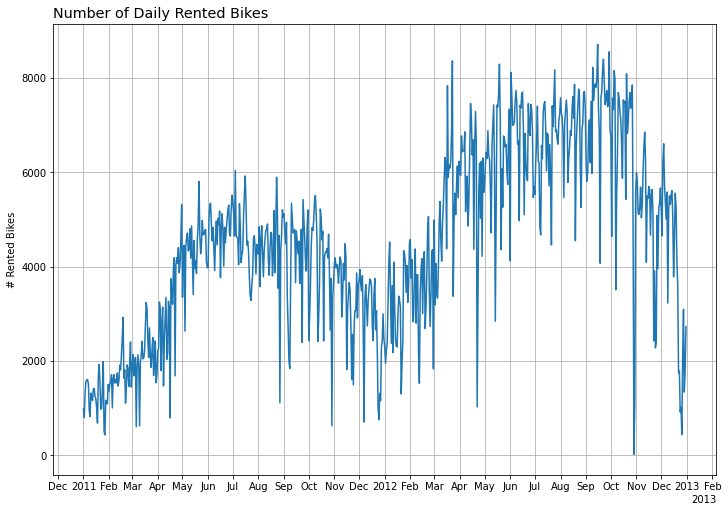

In [7]:
df_raw['day_date'] = pd.to_datetime(df_raw['dteday'])

fig, axs = plt.subplots(1, 1, figsize=(10, 7), constrained_layout=True)
axs.plot('day_date', 'cnt', data=df_raw)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(range(1, 13, 1))))
axs.xaxis.set_minor_locator(mdates.MonthLocator())
axs.grid(True)
axs.xaxis.set_major_formatter(mdates.ConciseDateFormatter(axs.xaxis.get_major_locator()))
axs.set_title('Number of Daily Rented Bikes', loc='left',
             fontsize='x-large')
axs.set_ylabel(r'# Rented Bikes')

Text(0, 0.5, 'Normalized temperature')

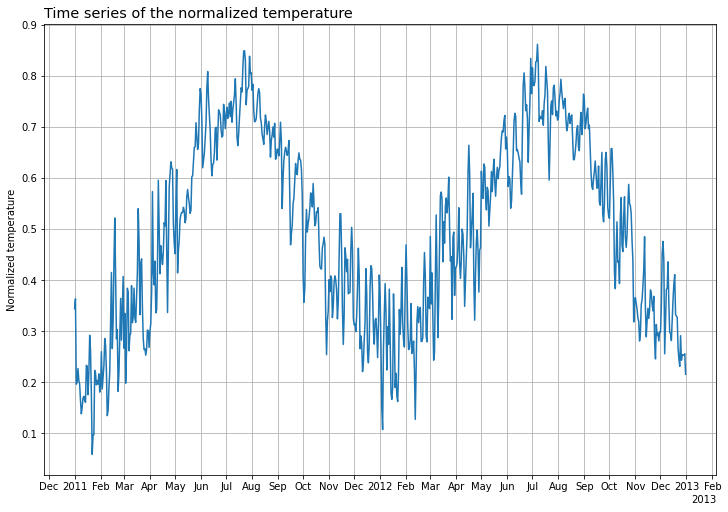

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7), constrained_layout=True)
axs.plot('day_date', 'temp', data=df_raw)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(range(1, 13, 1))))
axs.xaxis.set_minor_locator(mdates.MonthLocator())
axs.grid(True)
axs.xaxis.set_major_formatter(mdates.ConciseDateFormatter(axs.xaxis.get_major_locator()))
axs.set_title('Time series of the normalized temperature', loc='left',
             fontsize='x-large')
axs.set_ylabel(r'Normalized temperature')

Text(0, 0.5, 'Normalized windspeed')

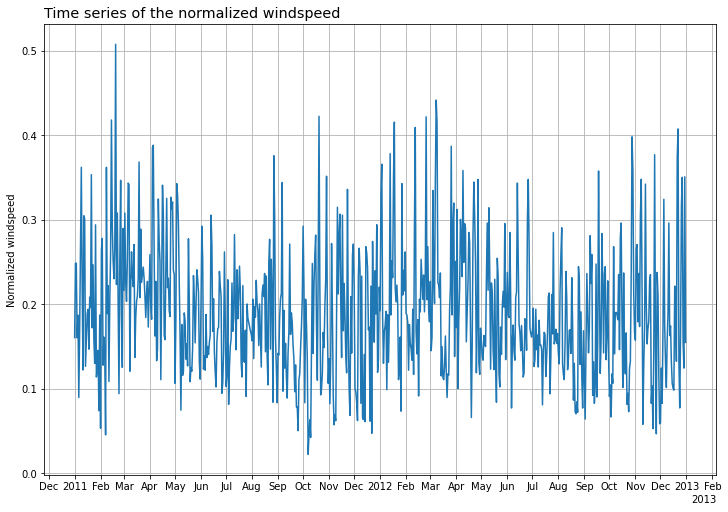

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7), constrained_layout=True)
axs.plot('day_date', 'windspeed', data=df_raw)
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(range(1, 13, 1))))
axs.xaxis.set_minor_locator(mdates.MonthLocator())
axs.grid(True)
axs.xaxis.set_major_formatter(mdates.ConciseDateFormatter(axs.xaxis.get_major_locator()))
axs.set_title('Time series of the normalized windspeed', loc='left',
             fontsize='x-large')
axs.set_ylabel(r'Normalized windspeed')

In [ ]:
df_raw[[""]].describe(include='object')

,dteday,year_month,workingday_txt,weathersit_txt,season_txt,day_txt
count,731,731,731,731,731,731
unique,731,24,2,3,4,7
top,2011-01-01,2011 1,Workingday,Clear,3_Sommer,6_Sat
freq,1,31,500,463,188,105


In [10]:
df_raw['day_date'] = pd.to_datetime(df_raw['dteday'])
df_raw['year'] = pd.DatetimeIndex(df_raw['day_date']).year
df_raw['month'] = pd.DatetimeIndex(df_raw['day_date']).month
df_raw['year_month'] = df_raw['year'].astype(str) + " " + df_raw['month'].astype(str)

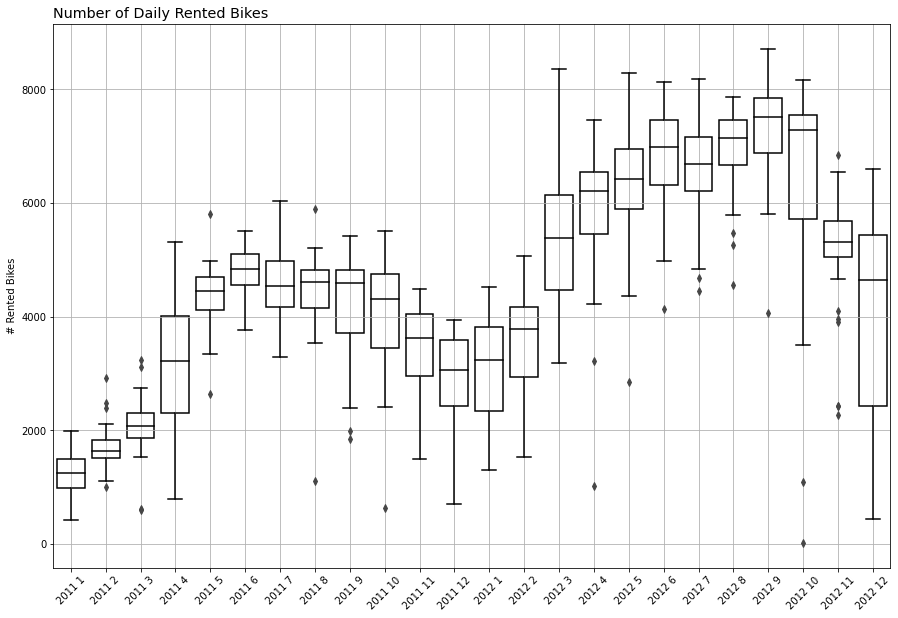

In [11]:
fig, ax = plt.subplots(1,1)
sns.boxplot(x='year_month', y='cnt', data=df_raw, order=["2011 1", "2011 2", "2011 3", "2011 4", "2011 5","2011 6", "2011 7", "2011 8","2011 9", "2011 10", "2011 11", "2011 12", 
                                                                "2012 1", "2012 2", "2012 3", "2012 4", "2012 5","2012 6", "2012 7", "2012 8","2012 9", "2012 10", "2012 11", "2012 12"])
ax.set_ylabel(r'# Rented Bikes')
ax.set_title('Number of Daily Rented Bikes', loc='left',
             fontsize='x-large')
ax.grid(True)
ax.set_xlabel(r'')
plt.xticks(rotation=45)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

plt.show()



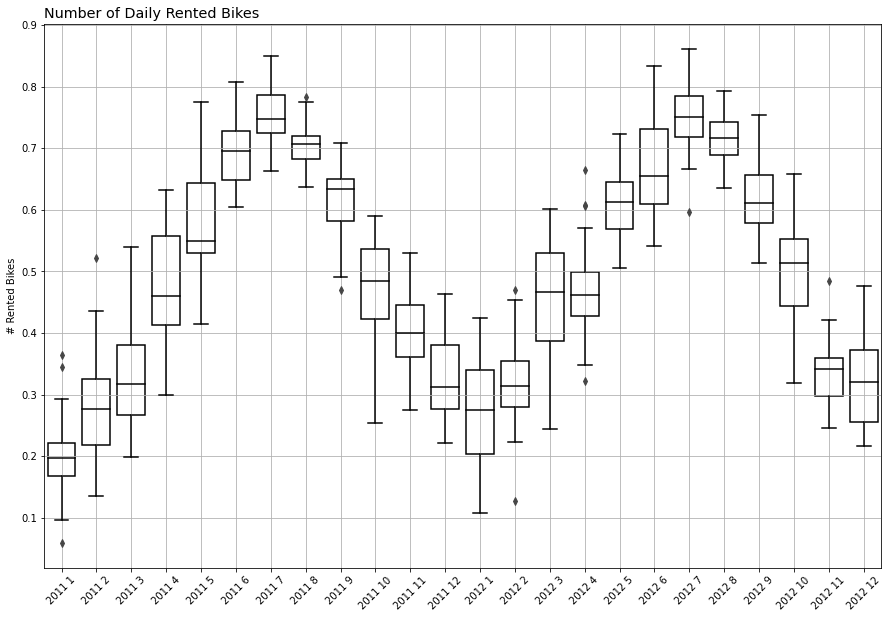

In [12]:
fig, ax = plt.subplots(1,1)
sns.boxplot(x='year_month', y='temp', data=df_raw, order=["2011 1", "2011 2", "2011 3", "2011 4", "2011 5","2011 6", "2011 7", "2011 8","2011 9", "2011 10", "2011 11", "2011 12", 
                                                                "2012 1", "2012 2", "2012 3", "2012 4", "2012 5","2012 6", "2012 7", "2012 8","2012 9", "2012 10", "2012 11", "2012 12"])
ax.set_ylabel(r'# Rented Bikes')
ax.set_title('Number of Daily Rented Bikes', loc='left',
             fontsize='x-large')
ax.grid(True)
ax.set_xlabel(r'')
plt.xticks(rotation=45)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

plt.show()

In [ ]:
df_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_date,year,month,year_month
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01,2011,1,2011 1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-02,2011,1,2011 1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-03,2011,1,2011 1
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-04,2011,1,2011 1
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-05,2011,1,2011 1


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


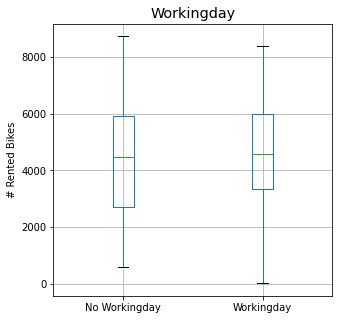

In [13]:
conditions = [
    (df_raw['workingday'] == 1),
    (df_raw['workingday'] == 0)]

values = ['Workingday', 'No Workingday']

df_raw['workingday_txt'] = np.select(conditions, values)

fig, ax = plt.subplots(1,1)
ax.set_title('Workingday', loc='center',
             fontsize='x-large')
df_raw.pivot(columns='workingday_txt', values='cnt').boxplot()
ax.set_ylabel(r'# Rented Bikes')
fig.set_figheight(5)
fig.set_figwidth(5)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


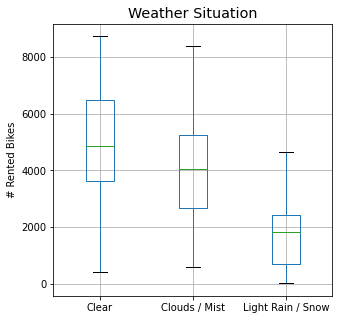

In [14]:
conditions = [
    (df_raw['weathersit'] == 1),
    (df_raw['weathersit'] == 2),
    (df_raw['weathersit'] == 3)]

values = ['Clear', 'Clouds / Mist', 'Light Rain / Snow']

df_raw['weathersit_txt'] = np.select(conditions, values)

fig, ax = plt.subplots(1,1)
df_raw.pivot(columns='weathersit_txt', values='cnt').boxplot()
ax.set_title('Weather Situation', loc='center',
             fontsize='x-large')
ax.set_ylabel(r'# Rented Bikes')
fig.set_figheight(5)
fig.set_figwidth(5)
plt.show()

In [ ]:
df_raw['weathersit'].unique()

array([2, 1, 3])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


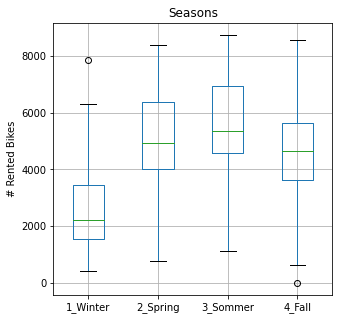

In [15]:
conditions = [
    (df_raw['season'] == 1),
    (df_raw['season'] == 2),
    (df_raw['season'] == 3),
    (df_raw['season'] == 4)]

values = ['1_Winter', '2_Spring', '3_Sommer', '4_Fall']

df_raw['season_txt'] = np.select(conditions, values)

fig, ax = plt.subplots(1,1)
df_raw.pivot(columns='season_txt', values='cnt').boxplot()
ax.set_title('Seasons')
ax.set_ylabel(r'# Rented Bikes')
fig.set_figheight(5)
fig.set_figwidth(5)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


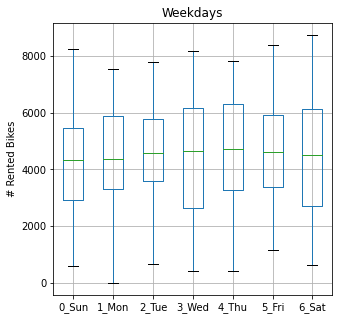

In [16]:
conditions = [
    (df_raw['weekday'] == 0),
    (df_raw['weekday'] == 1),
    (df_raw['weekday'] == 2),
    (df_raw['weekday'] == 3),
    (df_raw['weekday'] == 4),
    (df_raw['weekday'] == 5),
    (df_raw['weekday'] == 6)]

values = ['0_Sun', '1_Mon', '2_Tue', '3_Wed','4_Thu', '5_Fri', '6_Sat']

df_raw['day_txt'] = np.select(conditions, values)

fig, ax = plt.subplots(1,1)
df_raw.pivot(columns='day_txt', values='cnt').boxplot()
ax.set_title('Weekdays')
ax.set_ylabel(r'# Rented Bikes')
fig.set_figheight(5)
fig.set_figwidth(5)
plt.show()

In [17]:

df_final = df_raw.drop(columns=['instant', 'yr','mnth','holiday','atemp','hum','casual','registered','day_date', 'year','month','year_month'])

df_final.head()

,dteday,season,weekday,workingday,weathersit,temp,windspeed,cnt,workingday_txt,weathersit_txt,season_txt,day_txt
0,2011-01-01,1,6,0,2,0.344167,0.160446,985,No Workingday,Clouds / Mist,1_Winter,6_Sat
1,2011-01-02,1,0,0,2,0.363478,0.248539,801,No Workingday,Clouds / Mist,1_Winter,0_Sun
2,2011-01-03,1,1,1,1,0.196364,0.248309,1349,Workingday,Clear,1_Winter,1_Mon
3,2011-01-04,1,2,1,1,0.200000,0.160296,1562,Workingday,Clear,1_Winter,2_Tue
4,2011-01-05,1,3,1,1,0.226957,0.186900,1600,Workingday,Clear,1_Winter,3_Wed


In [ ]:
pd.set_option('display.max_columns', None)

df_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_date,year,month,year_month,workingday_txt,weathersit_txt,season_txt,day_txt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01,2011,1,2011 1,No Workingday,Clouds / Mist,1_Winter,6_Sat
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-02,2011,1,2011 1,No Workingday,Clouds / Mist,1_Winter,0_Sun
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-03,2011,1,2011 1,Workingday,Clear,1_Winter,1_Mon
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-04,2011,1,2011 1,Workingday,Clear,1_Winter,2_Tue
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-05,2011,1,2011 1,Workingday,Clear,1_Winter,3_Wed


#### Working Days Hypothesis

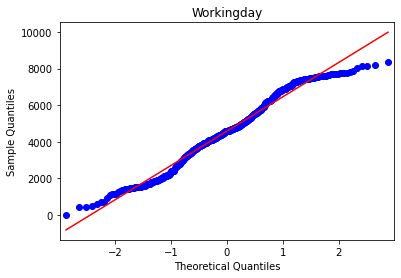

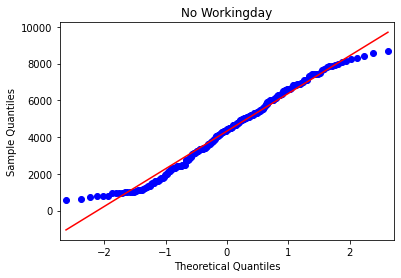

In [ ]:
a = df_raw.loc[df_raw["workingday"] == 1, "cnt"]
fig=sm.qqplot(a, line='s')
plt.title("Workingday")
plt.show()

a = df_raw.loc[df_raw["workingday"] == 0, "cnt"]
fig=sm.qqplot(a, line='s')
plt.title("No Workingday")
plt.show()

In [ ]:
for i in [0,1]:
  print(f'Test for workingday = {i}')
  a = df_raw.loc[df_raw["workingday"] == i, "cnt"]
  k1, p1 = stats.normaltest(a) # D Agostino-Pearson. The method returns the test statistic value and the p-value
  k2, p2 = stats.shapiro(a)
  k3, p3 = stats.kstest(a, stats.norm.cdf)
  alpha = 0.001 # Rejection criterion defined by you

  print(f'''
D Agostino-Pearson: {p1}
Shapiro: {p2}
Smirnov: {p3} \n''')

#  print('Alpha = ',alpha)
#  print('p = ',p)
#  if p < alpha:  # null hypothesis: x comes from a normal distribution
#    print("The null hypothesis can be rejected")
#  else:
#    print("The null hypothesis cannot be rejected")

Test for workingday = 0

D Agostino-Pearson: 5.768048829045641e-06
Shapiro: 0.0006035277037881315
Smirnov: 0.0 

Test for workingday = 1

D Agostino-Pearson: 1.1536584362721227e-08
Shapiro: 3.4888859090642654e-07
Smirnov: 0.0 



Hypothese:
H1: Working days > not working days

In [ ]:
stats.mannwhitneyu(df_raw.loc[df_raw["workingday"] == 1, "cnt"], df_raw.loc[df_raw["workingday"] == 0, "cnt"], alternative='greater')

MannwhitneyuResult(statistic=61893.0, pvalue=0.05930266509275421)

#### Weather Test

In [ ]:
a = df_raw.loc[df_raw["weathersit"] == 1, "cnt"]
fig=sm.qqplot(a, line='s')
plt.title("Weather Situation 'Clear'")
plt.show()

a = df_raw.loc[df_raw["weathersit"] == 2, "cnt"]
fig=sm.qqplot(a, line='s')
plt.title("Weather Situation 'Clouds / Mist'")
plt.show()

a = df_raw.loc[df_raw["weathersit"] == 3, "cnt"]
fig=sm.qqplot(a, line='s')
plt.title("Weather Situation 'Light rain / Light Snow'")
plt.show()

In [ ]:
for i in [1,2,3]:
  print(f'Test for Weather = {i}')
  a = df_raw.loc[df_raw["weathersit"] == i, "cnt"]
  k1, p1 = stats.normaltest(a) # D Agostino-Pearson. The method returns the test statistic value and the p-value
  k2, p2 = stats.shapiro(a)
  k3, p3 = stats.kstest(a, stats.norm.cdf)
  alpha = 0.001 # Rejection criterion defined by you

  print(f'''
D Agostino-Pearson: {p1}
Shapiro: {p2}
Smirnov: {p3} \n''')

Test for Weather = 1

D Agostino-Pearson: 1.9293968805876282e-07
Shapiro: 7.900773653091164e-07
Smirnov: 0.0 

Test for Weather = 2

D Agostino-Pearson: 0.002037243557785933
Shapiro: 0.001498431316576898
Smirnov: 0.0 

Test for Weather = 3

D Agostino-Pearson: 0.2098372841167297
Shapiro: 0.09226478636264801
Smirnov: 0.0 



In [ ]:
stats.kruskal(df_raw.loc[df_raw["weathersit"] == 1, "cnt"], 
              df_raw.loc[df_raw["weathersit"] == 2, "cnt"],
              df_raw.loc[df_raw["weathersit"] == 3, "cnt"])

KruskalResult(statistic=67.17520449165305, pvalue=2.588747451005407e-15)

#### Season Hypothesis

In [ ]:
a = df_raw.loc[df_raw["season"] == 1, "cnt"]
fig=sm.qqplot(a, line='s')
plt.title("Season Winter")
plt.show()

a = df_raw.loc[df_raw["season"] == 2, "cnt"]
fig=sm.qqplot(a, line='s')
plt.title("Season Spring")
plt.show()

a = df_raw.loc[df_raw["season"] == 3, "cnt"]
fig=sm.qqplot(a, line='s')
plt.title("Season Summer")
plt.show()

a = df_raw.loc[df_raw["season"] == 4, "cnt"]
fig=sm.qqplot(a, line='s')
plt.title("Season Fall")
plt.show()

In [ ]:
for i in [1,2,3,4]:
  print(f'Test for Season = {i}')
  a = df_raw.loc[df_raw["season"] == i, "cnt"]
  k1, p1 = stats.normaltest(a) # D Agostino-Pearson. The method returns the test statistic value and the p-value
  k2, p2 = stats.shapiro(a)
  k3, p3 = stats.kstest(a, stats.norm.cdf)
  alpha = 0.001 # Rejection criterion defined by you

  print(f'''
D Agostino-Pearson: {p1}
Shapiro: {p2}
Smirnov: {p3} \n''')

Test for Season = 1

D Agostino-Pearson: 2.416927932519993e-05
Shapiro: 4.983239705325104e-07
Smirnov: 0.0 

Test for Season = 2

D Agostino-Pearson: 0.027670508694163657
Shapiro: 0.0079073840752244
Smirnov: 0.0 

Test for Season = 3

D Agostino-Pearson: 0.09555534942994848
Shapiro: 7.678098336327821e-05
Smirnov: 0.0 

Test for Season = 4

D Agostino-Pearson: 0.6905167085990185
Shapiro: 0.018196173012256622
Smirnov: 0.0 



In [ ]:
stats.kruskal(df_raw.loc[df_raw["season"] == 1, "cnt"], 
              df_raw.loc[df_raw["season"] == 2, "cnt"],
              df_raw.loc[df_raw["season"] == 3, "cnt"],
              df_raw.loc[df_raw["season"] == 4, "cnt"])

KruskalResult(statistic=250.9335046488973, pvalue=4.110755793069794e-54)

In [ ]:
stats.mannwhitneyu(df_raw.loc[df_raw["season"] == 2, "cnt"], df_raw.loc[df_raw["season"] == 4, "cnt"], alternative='greater')

MannwhitneyuResult(statistic=18060.0, pvalue=0.04538561771786776)

In [ ]:
df_raw = df_raw.drop(columns=['instant','yr', 'mnth','holiday','atemp','hum','casual','registered'])
df_raw.head()

,dteday,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,workingday_txt,weathersit_txt,season_txt,day_txt
0,2011-01-01,1,6,0,2,0.344167,0.805833,0.160446,985,No Workingday,Clouds / Mist,1_Winter,6_Sat
1,2011-01-02,1,0,0,2,0.363478,0.696087,0.248539,801,No Workingday,Clouds / Mist,1_Winter,0_Sun
2,2011-01-03,1,1,1,1,0.196364,0.437273,0.248309,1349,Workingday,Clear,1_Winter,1_Mon
3,2011-01-04,1,2,1,1,0.200000,0.590435,0.160296,1562,Workingday,Clear,1_Winter,2_Tue
4,2011-01-05,1,3,1,1,0.226957,0.436957,0.186900,1600,Workingday,Clear,1_Winter,3_Wed


In [ ]:
df_raw.head()

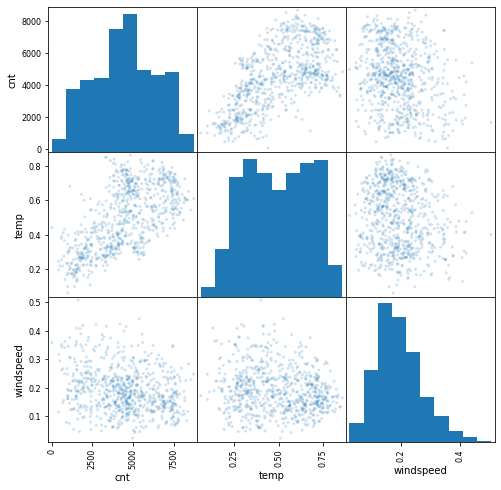

In [ ]:
#plt.scatter(df_raw[["temp"]], df_raw[["cnt"]])
#plt.show()

#plt.scatter(df_raw[["windspeed"]], df_raw[["cnt"]])
#plt.show()

scatter_matrix(df_raw[["cnt","temp","windspeed"]], alpha=0.2, figsize=(8, 8), diagonal='hist')
plt.show()

In [ ]:
df_raw[["cnt","temp","windspeed"]].corr()

,cnt,temp,windspeed
cnt,1.000000,0.627494,-0.234545
temp,0.627494,1.000000,-0.157944
windspeed,-0.234545,-0.157944,1.000000


In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#X = df_raw[['temp','windspeed']]
X = df_raw[['windspeed']]
y = df_raw['cnt']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     42.44
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.36e-10
Time:                        19:38:02   Log-Likelihood:                -6549.0
No. Observations:                 731   AIC:                         1.310e+04
Df Residuals:                     729   BIC:                         1.311e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5621.1529    185.062     30.374      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


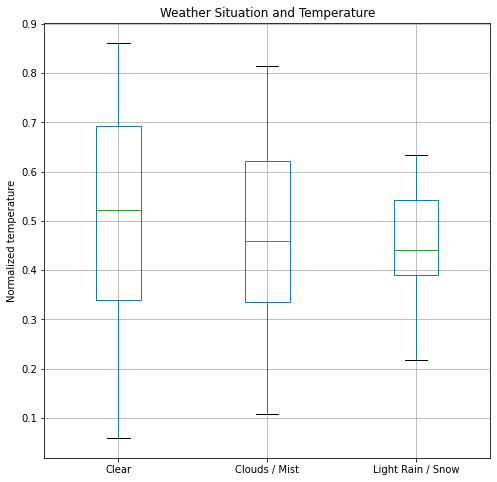

In [ ]:
fig, ax = plt.subplots(1,1)
df_raw.pivot(columns='weathersit_txt', values='temp').boxplot()
ax.set_title('Weather Situation and Temperature')
ax.set_ylabel(r'Normalized temperature')
fig.set_figheight(8)
fig.set_figwidth(8)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


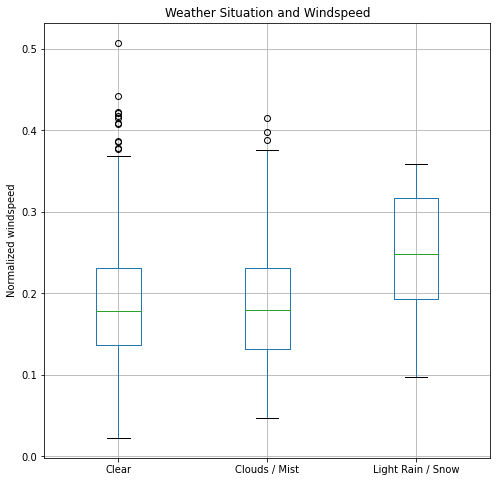

In [ ]:
fig, ax = plt.subplots(1,1)
df_raw.pivot(columns='weathersit_txt', values='windspeed').boxplot()
ax.set_title('Weather Situation and Windspeed')
ax.set_ylabel(r'Normalized windspeed')
fig.set_figheight(8)
fig.set_figwidth(8)
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

df_raw_bu = df_raw

x = pd.get_dummies(df_raw_bu['weathersit_txt'])

final_df = df_raw_bu.join(x)
pd.set_option("display.max_rows", None)

#pd.set_option('display.max_columns', None)
#final_df.head()
#X = df_raw[['temp','windspeed']]
X = final_df[['temp','windspeed','Clear','Clouds / Mist']]
y = final_df['cnt']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     160.6
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           2.03e-98
Time:                        19:28:48   Log-Likelihood:                -6338.0
No. Observations:                 731   AIC:                         1.269e+04
Df Residuals:                     726   BIC:                         1.271e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -112.1636    382.157     -0.294

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Hypothese 1
- Weekday on average more rentals than weekend-day

Hypothese 2
- There is a difference in rented bikes between the weather-situation groups

Hypothese 3
- there is a difference in rented bikes between the seasons
  - if so, Fall > Spring

Regression
- count ~  temperature, feeling temperature (correlation?)

Plots:
- Zeitreihe counts
- Boxplots (Hyp1, Hyp3)
- Normality tests for count
- Tests -> Hyp 1, Hyp 3
- Korrelation temp. feeling temp
- Regression

instant: record index

dteday : date

season : season (1:winter, 2:spring, 3:summer, 4:fall)

yr : year (0: 2011, 1:2012)

mnth : month ( 1 to 12)

hr : hour (0 to 23)

holiday : weather day is holiday or not

weekday : day of the week

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp : Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered